## Problem Statement: 
The Management team of Retail Shopping mart, wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more than men? Do married persons spend more than unmarried? How is spending behaviour accross different age groups?

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data from the csv
df = pd.read_csv('data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

As we can see that the data has 9 columns and they don't have any missing values

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### Analysis of Male and Female 

In [8]:
df.groupby(['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

We have more purchase data of the male when compared to females.


In [9]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


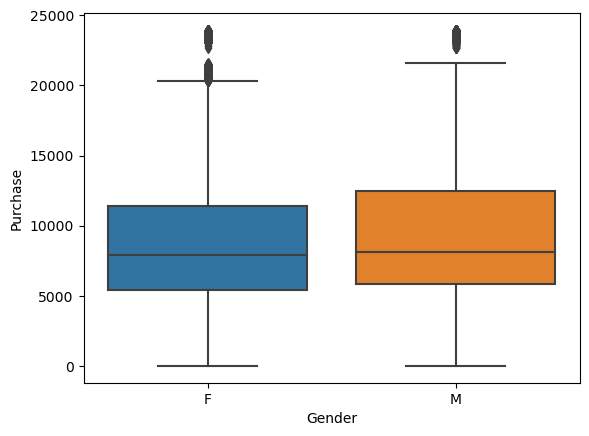

In [10]:
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.show()

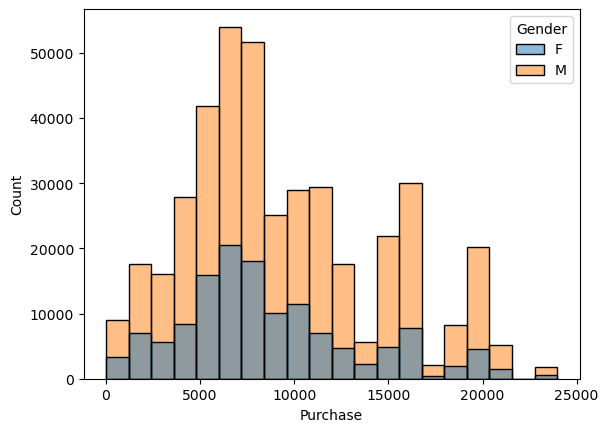

In [11]:
sns.histplot(data=df,x='Purchase',bins=20,hue='Gender')
plt.show()

- Generally Male mean purchase is higher than female.
- Most of the purchase lie in between 4000 to 16000

## CLT Analysis 

### Gender v/s Purchase

In [12]:
male_sample_means = [df[df['Gender']=='M']['Purchase'].sample(200).mean() for i in range(1000)]
female_sample_means = [df[df['Gender']=='F']['Purchase'].sample(200).mean() for i in range(1000)]

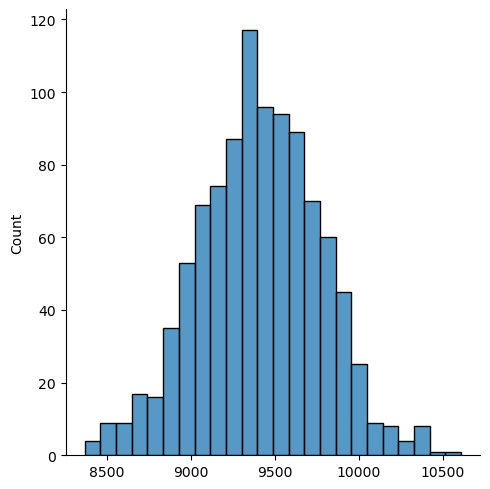

In [13]:
sns.displot(male_sample_means)
plt.show()

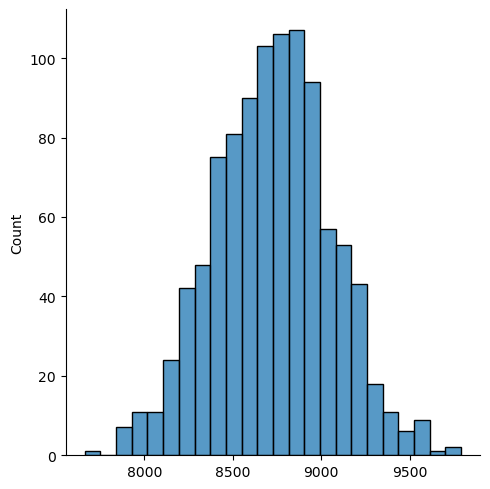

In [14]:
sns.displot(female_sample_means)
plt.show()

In [16]:
print('Male Mean Purchase:',np.mean(male_sample_means),'Female Mean Purchase:',np.mean(female_sample_means))

Male Mean Purchase: 9410.883285 Female Mean Purchase: 8726.14411


In [17]:
male_upper_limit= np.mean(male_sample_means) + (1.96 * np.std(male_sample_means) / np.sqrt(1000))
male_lower_limit= np.mean(male_sample_means) - (1.96 * np.std(male_sample_means) / np.sqrt(1000))

In [18]:
print('95% CLT for Male Purchase is',(male_lower_limit,male_upper_limit))

95% CLT for Male Purchase is (9388.458263167791, 9433.308306832208)


In [19]:
female_upper_limit= np.mean(female_sample_means) + (1.96 * np.std(female_sample_means) / np.sqrt(1000))
female_lower_limit= np.mean(female_sample_means) - (1.96 * np.std(female_sample_means) / np.sqrt(1000))

In [20]:
print('95% CLT for Female Purchase is',(female_lower_limit,female_upper_limit))

95% CLT for Female Purchase is (8705.662276817193, 8746.625943182806)


The CLT of the Male and Female purchases donot overlap.

### Marital Status v/s Purchase

In [21]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [24]:
married_sample_means = [df[df['Marital_Status']==1]['Purchase'].sample(200).mean() for i in range(1000)]
unmarried_sample_means = [df[df['Marital_Status']==0]['Purchase'].sample(200).mean() for i in range(1000)]

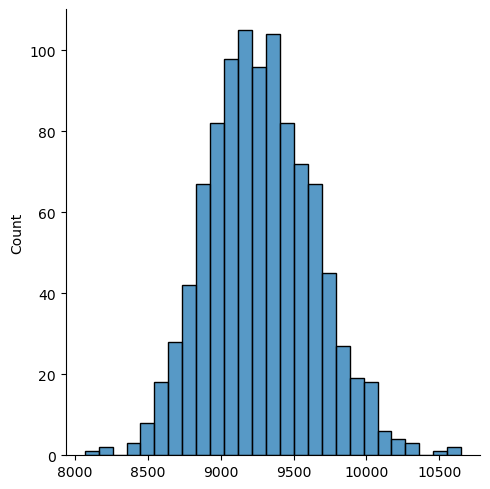

In [26]:
sns.displot(married_sample_means)
plt.show()

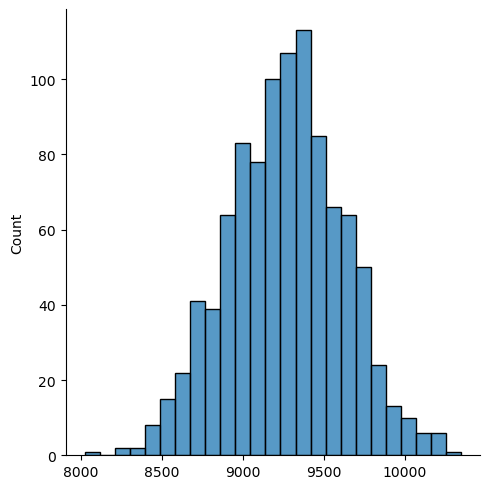

In [27]:
sns.displot(unmarried_sample_means)
plt.show()

In [28]:
print('Married Purchase mean',np.mean(married_sample_means),'Unmarried Purchase mean',np.mean(unmarried_sample_means))

Married Purchase mean 9275.47671 Unmarried Purchase mean 9263.657715


In [30]:
married_upper_limit = np.mean(married_sample_means) + (1.96 * np.std(married_sample_means)/np.sqrt(1000))
married_lower_limit = np.mean(married_sample_means) - (1.96 * np.std(married_sample_means)/np.sqrt(1000))

In [31]:
print('95% CLT for the married persons purchase is ',(married_lower_limit,married_upper_limit))

95% CLT for the married persons purchase is  (9252.996195699252, 9297.95722430075)


In [32]:
unmarried_upper_limit = np.mean(unmarried_sample_means) + (1.96 * np.std(unmarried_sample_means)/np.sqrt(1000))
unmarried_lower_limit = np.mean(unmarried_sample_means) - (1.96 * np.std(unmarried_sample_means)/np.sqrt(1000))

In [59]:
print('95% CLT for the unmarried persons purchase is ',(unmarried_lower_limit,unmarried_upper_limit))

95% CLT for the unmarried persons purchase is  (9241.723779327456, 9285.591650672543)


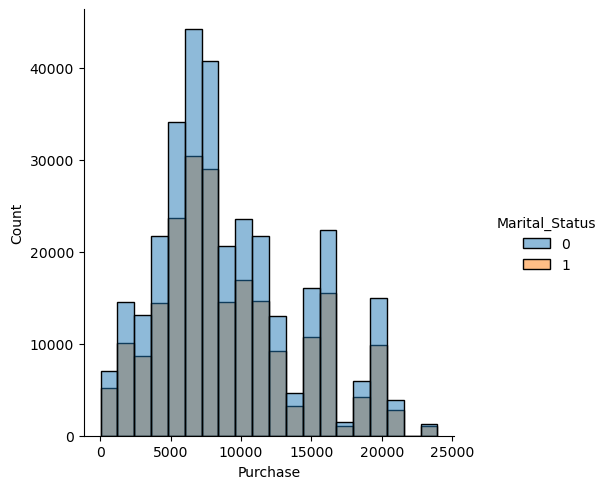

In [34]:
sns.displot(x='Purchase',hue='Marital_Status',bins=20,data=df)
plt.show()

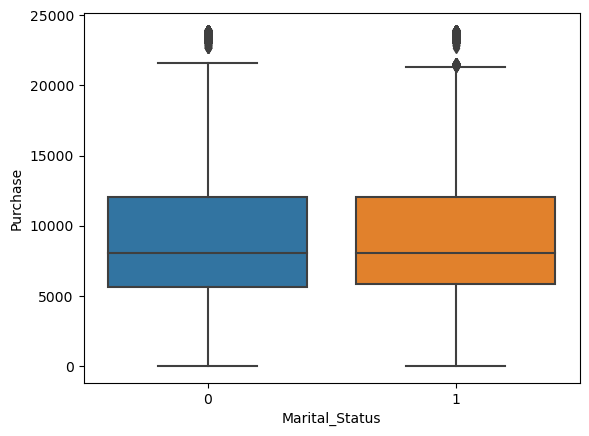

In [35]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.show()

- The means of purchase of married and un married are almost same.
- The CLT of Purchase for Married and Unmarried customers overlap.

### CLT on Age

In [36]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [37]:
df.groupby('Age')['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

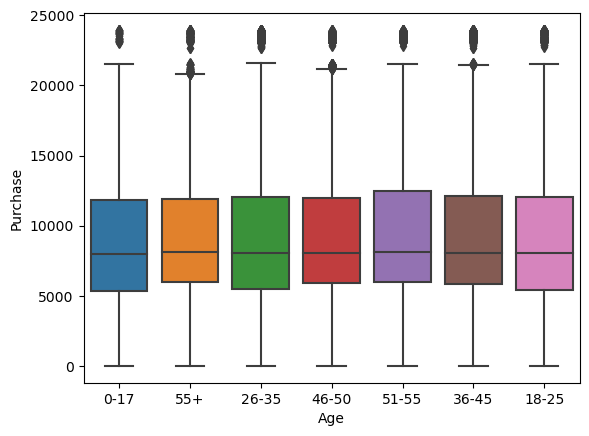

In [38]:
sns.boxplot(x='Age',y='Purchase',data=df)
plt.show()

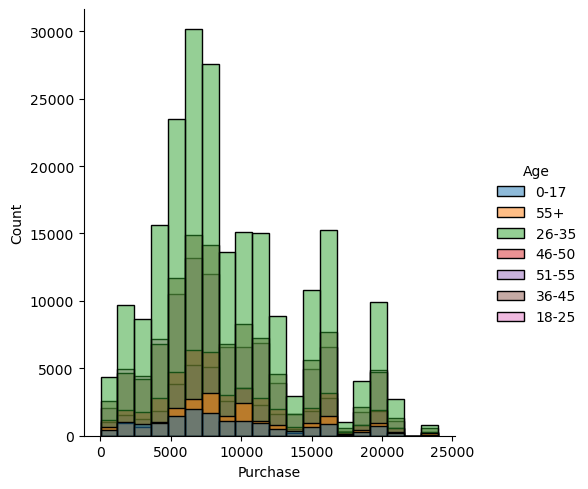

In [39]:
sns.displot(x='Purchase',hue='Age',bins=20,data=df)
plt.show()

In [44]:
age_group_means_dict = {}

In [45]:
age_groups = np.unique(df['Age'])

In [47]:
for age in age_groups:
    age_group_means_dict[age] = [df[df['Age']== age ]['Purchase'].sample(100).mean() for i in range(1000)]

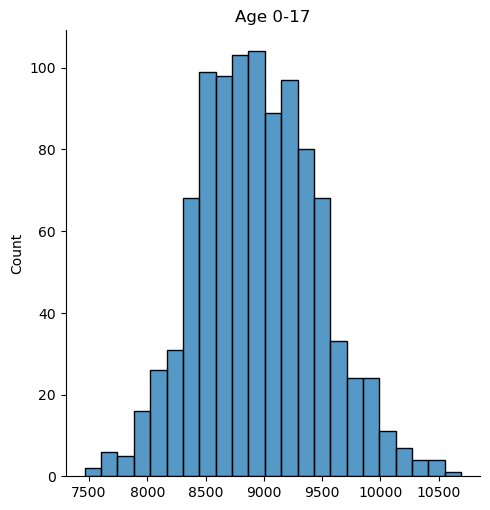

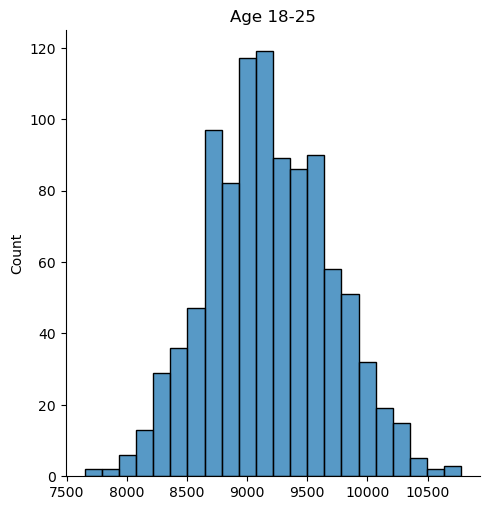

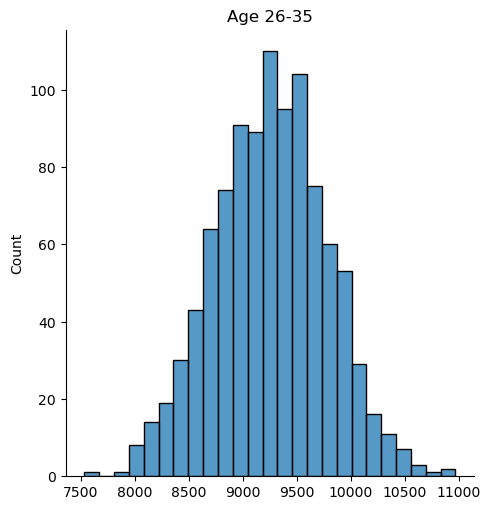

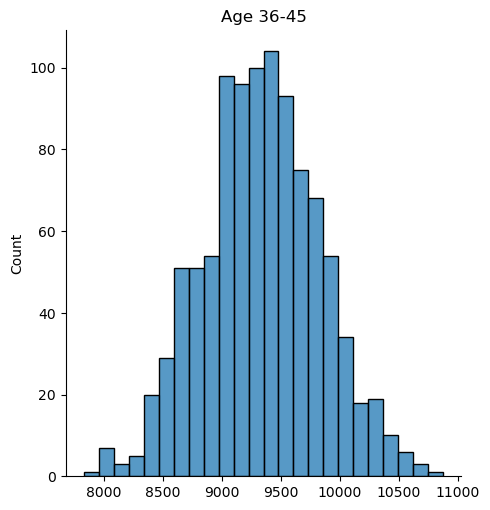

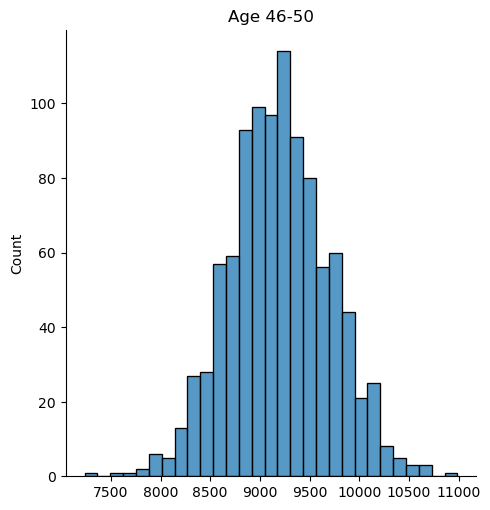

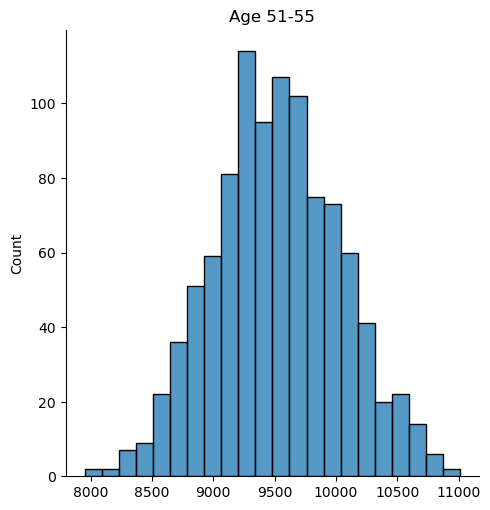

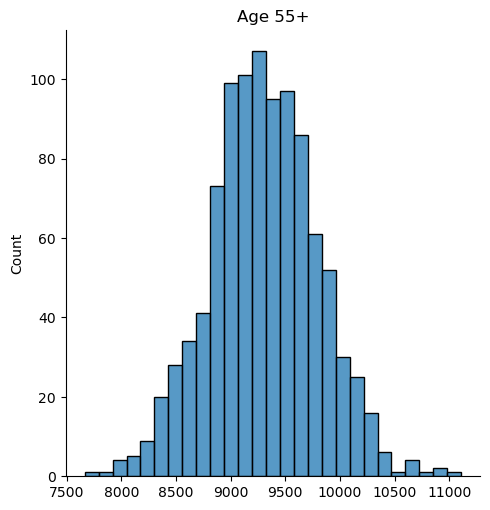

In [55]:

for age in age_groups:
    sns.displot(age_group_means_dict[age])
    plt.title('Age '+age)

    

In [56]:
def calculate_clt(data):
    upper_limit= np.mean(data) + (1.96 * np.std(data) / np.sqrt(1000))
    lower_limit= np.mean(data) - (1.96 * np.std(data) / np.sqrt(1000))
    return (lower_limit,upper_limit)


In [57]:
for age in age_groups:
    print('CLT for the age group',age,calculate_clt(age_group_means_dict[age]))

CLT for the age group 0-17 (8920.625070130563, 8983.974149869437)
CLT for the age group 18-25 (9147.988491843742, 9210.80566815626)
CLT for the age group 26-35 (9224.347943561457, 9288.58503643854)
CLT for the age group 36-45 (9305.105781926257, 9366.35229807374)
CLT for the age group 46-50 (9163.421641306402, 9225.913578693595)
CLT for the age group 51-55 (9487.657325400758, 9551.522674599242)
CLT for the age group 55+ (9275.158028530588, 9335.618431469413)


- Confidence Intervals of Age bins overlap
- Mean purchase of Age group 51-55 is more than any other age group

### <h1>Conculsions </h1>


- Most of the purchase lie in between 4000 to 16000.
- 95% CLT for Male Purchase is (9388.458263167791, 9433.308306832208).
- 95% CLT for Female Purchase is (8705.662276817193, 8746.625943182806)
- The CLT of the Male and Female purchases donot overlap.
- There is variations in mean purchase of male and female, Male mean purchase is higher than female.
- 95% CLT for the married persons purchase is  (9252.996195699252, 9297.95722430075).
- 95% CLT for the unmarried persons purchase is  (9241.723779327456, 9285.591650672543).
- The means of purchase of married and un married are almost same.
- The CLT of Purchase for Married and Unmarried customers overlap.
- Purchase is not that affected by the marital status.
- Mean Purchase of Age 55+ is more than any other age group.